我们将使用Kaggle的数据集，利用线性回归模型，依据大学各项排名的指标来预测其综合得分。可以使用 sk-learn 等第三方库，不要求自己实现线性回归.

基础任务（80分）：
- 1.观察和可视化数据，揭示数据的特性。
- 2.训练集和测试集应按照7:3的比例随机划分，采用RMSE（均方根误差）作为模型的评估标准，计算并获取测试集上的线性回归模型的RMSE值。
- 3.对线性回归模型中的系数进行分析。
- 4.尝试使用其他类型的回归模型，并比较其效果。

进阶任务（20分）：
- 1.尝试将地区的离散特征融入到线性回归模型中，然后比较并分析结果。
- 2.利用R2指标和VIF指标进行模型评价和特征筛选, 尝试是否可以增加模型精度。
- 

In [8]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)  # 设置显示最大行
np.set_printoptions(threshold=10)

data_df = pd.read_csv('D:\AI\基于回归分析的大学综合得分预测\cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame

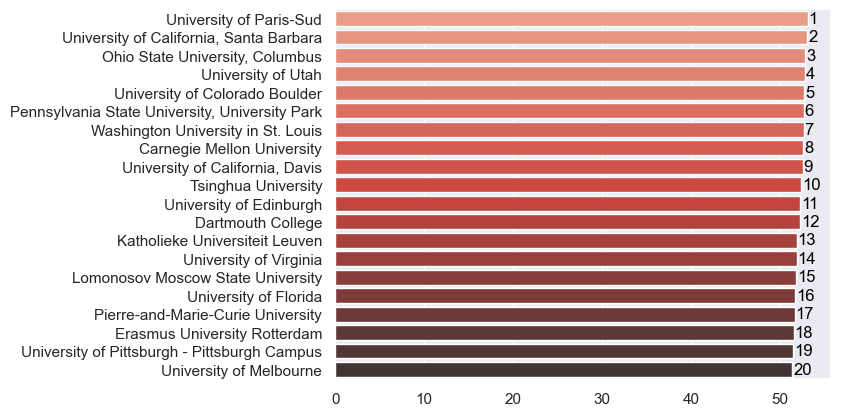

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# 专用于jupyter的魔法指令
%matplotlib inline
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']# 设置字体为宋体
data_df1=data_df
data_df1=data_df1.drop("region",axis=1)
mean_df = data_df1.groupby('institution').mean() # 按学校聚合并对聚合的列取平均，就是计算这个学校这几年来每一项数据的均值
mean_df.to_excel('output.xlsx', index=True)
top_df = mean_df.sort_values(by='score', ascending=False).iloc[50:70]  # 取某一部分学校的切片
sns.set()
x = top_df['score'].values  # 综合得分列表
y = top_df.index.values  # 学校名称列表
sns.barplot(x=x, y=y, palette="Reds_d")  # 画条形图
# 画水平条形图
ax = sns.barplot(x=x, y=y, palette="Reds_d")

# 在每个条形的右侧添加序号
for i, v in enumerate(x):
    ax.text(v + 0.1, i, str(i+1), color='black', va='center')

plt.show()


